# Importing Data

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("life_expectancy.csv")
#This dataset was created by the World Health Organization and can be found at https://www.kaggle.com/kumarajarshi/life-expectancy-who.

In [3]:
dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Data Preprocessing

In [4]:
dataset.drop(["Country", "Year"], axis=1, inplace=True)
#These two columns vary too much and don't provide much useful information.

In [5]:
dataset.dropna(inplace=True)

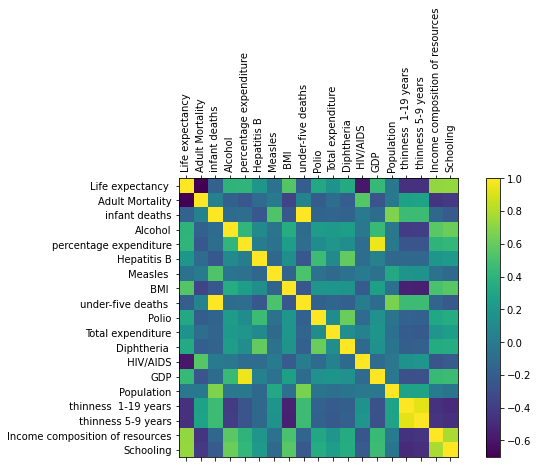

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.matshow(dataset.corr(), fignum=1)
plt.xticks(range(dataset.select_dtypes(['number']).shape[1]), dataset.select_dtypes(['number']).columns, rotation=90)
plt.yticks(range(dataset.select_dtypes(['number']).shape[1]), dataset.select_dtypes(['number']).columns)
cb = plt.colorbar()
plt.show()

In [7]:
dataset.drop(["Population", "Measles "], axis=1, inplace=True)
#Dropped due to weak correlations

In [8]:
features = dataset.iloc[:, dataset.columns != "Life expectancy "]

In [9]:
labels = dataset["Life expectancy "]

In [10]:
features = pd.get_dummies(features)
#Converting categorical variables into quantitative variables

In [11]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=.2)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_columns = features.select_dtypes(["number"]).columns
ct = ColumnTransformer(
  [("num_only", StandardScaler(), numeric_columns)],
    remainder="passthrough"
  )

In [13]:
features_train_scaled = ct.fit_transform(features_train)
features_test_scaled = ct.transform(features_test)

# Building and Training Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
num_columns = len(features.columns)
model.add(layers.InputLayer(input_shape = len(features.columns)))
model.add(layers.Dense(256, activation="sigmoid"))
model.add(layers.Dropout(.2))
model.add(layers.Dense(256, activation="sigmoid"))
model.add(layers.Dropout(.2))
model.add(layers.Dense(256, activation="sigmoid"))
model.add(layers.Dropout(.2))
model.add(layers.Dense(128, activation="sigmoid"))
model.add(layers.Dense(1))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4864      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [15]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=.001)
model.compile(loss="mse",
              optimizer=opt,
              metrics=["mae"])

In [16]:
history = model.fit(features_train_scaled, labels_train, epochs=250, batch_size=5, verbose=1, validation_split = .2)

Epoch 1/250
211/211 [==============================] - 3s 8ms/step - loss: 3221.9368 - mae: 55.8886 - val_loss: 2497.8201 - val_mae: 49.2097
Epoch 2/250
211/211 [==============================] - 1s 6ms/step - loss: 1883.6760 - mae: 42.3407 - val_loss: 1435.4858 - val_mae: 36.8682
Epoch 3/250
211/211 [==============================] - 1s 6ms/step - loss: 1051.3544 - mae: 31.0160 - val_loss: 765.7907 - val_mae: 26.2596
Epoch 4/250
211/211 [==============================] - 1s 6ms/step - loss: 520.0186 - mae: 20.9605 - val_loss: 361.0215 - val_mae: 17.3316
Epoch 5/250
211/211 [==============================] - 1s 6ms/step - loss: 247.5289 - mae: 14.0161 - val_loss: 181.7932 - val_mae: 11.9520
Epoch 6/250
211/211 [==============================] - 1s 6ms/step - loss: 136.6624 - mae: 10.2286 - val_loss: 112.1609 - val_mae: 9.2076
Epoch 7/250
211/211 [==============================] - 1s 6ms/step - loss: 96.2526 - mae: 8.3527 - val_loss: 86.3483 - val_mae: 7.8634
Epoch 8/250
211/211 [======

211/211 [==============================] - 1s 6ms/step - loss: 8.6809 - mae: 2.2278 - val_loss: 8.9993 - val_mae: 2.3044
Epoch 62/250
211/211 [==============================] - 1s 6ms/step - loss: 8.6066 - mae: 2.2142 - val_loss: 9.2469 - val_mae: 2.2264
Epoch 63/250
211/211 [==============================] - 1s 6ms/step - loss: 8.4568 - mae: 2.1835 - val_loss: 8.8623 - val_mae: 2.2741
Epoch 64/250
211/211 [==============================] - 1s 6ms/step - loss: 8.4576 - mae: 2.2263 - val_loss: 9.6673 - val_mae: 2.2870
Epoch 65/250
211/211 [==============================] - 1s 6ms/step - loss: 8.0734 - mae: 2.1667 - val_loss: 8.5400 - val_mae: 2.2373
Epoch 66/250
211/211 [==============================] - 1s 6ms/step - loss: 8.0646 - mae: 2.1129 - val_loss: 8.5530 - val_mae: 2.1918
Epoch 67/250
211/211 [==============================] - 1s 6ms/step - loss: 8.2671 - mae: 2.1742 - val_loss: 7.9571 - val_mae: 2.0709
Epoch 68/250
211/211 [==============================] - 1s 6ms/step - loss:

211/211 [==============================] - 1s 6ms/step - loss: 4.5653 - mae: 1.5613 - val_loss: 4.7584 - val_mae: 1.4666
Epoch 123/250
211/211 [==============================] - 1s 6ms/step - loss: 4.3161 - mae: 1.5187 - val_loss: 4.9300 - val_mae: 1.5079
Epoch 124/250
211/211 [==============================] - 1s 6ms/step - loss: 4.5741 - mae: 1.5553 - val_loss: 4.5991 - val_mae: 1.5060
Epoch 125/250
211/211 [==============================] - 1s 6ms/step - loss: 4.2153 - mae: 1.5000 - val_loss: 4.8082 - val_mae: 1.5079
Epoch 126/250
211/211 [==============================] - 1s 6ms/step - loss: 4.5064 - mae: 1.5471 - val_loss: 5.1452 - val_mae: 1.6086
Epoch 127/250
211/211 [==============================] - 1s 6ms/step - loss: 4.6027 - mae: 1.5809 - val_loss: 4.7801 - val_mae: 1.5201
Epoch 128/250
211/211 [==============================] - 1s 6ms/step - loss: 4.1523 - mae: 1.5048 - val_loss: 4.6478 - val_mae: 1.4637
Epoch 129/250
211/211 [==============================] - 1s 6ms/step 

Epoch 183/250
211/211 [==============================] - 1s 6ms/step - loss: 3.1552 - mae: 1.2925 - val_loss: 4.5751 - val_mae: 1.5452
Epoch 184/250
211/211 [==============================] - 1s 5ms/step - loss: 3.3055 - mae: 1.3167 - val_loss: 4.7250 - val_mae: 1.5394
Epoch 185/250
211/211 [==============================] - 1s 6ms/step - loss: 3.3038 - mae: 1.3244 - val_loss: 4.4750 - val_mae: 1.4738
Epoch 186/250
211/211 [==============================] - 1s 6ms/step - loss: 3.1716 - mae: 1.2968 - val_loss: 4.8873 - val_mae: 1.5685
Epoch 187/250
211/211 [==============================] - 1s 5ms/step - loss: 3.4485 - mae: 1.3330 - val_loss: 4.4626 - val_mae: 1.4071
Epoch 188/250
211/211 [==============================] - 1s 5ms/step - loss: 3.0631 - mae: 1.2561 - val_loss: 4.5104 - val_mae: 1.4411
Epoch 189/250
211/211 [==============================] - 1s 5ms/step - loss: 2.9942 - mae: 1.2269 - val_loss: 4.9137 - val_mae: 1.5175
Epoch 190/250
211/211 [==============================] 

211/211 [==============================] - 1s 6ms/step - loss: 2.6666 - mae: 1.1674 - val_loss: 3.7298 - val_mae: 1.3021
Epoch 244/250
211/211 [==============================] - 1s 6ms/step - loss: 2.6344 - mae: 1.1526 - val_loss: 4.0780 - val_mae: 1.3798
Epoch 245/250
211/211 [==============================] - 1s 6ms/step - loss: 2.6406 - mae: 1.1700 - val_loss: 3.8669 - val_mae: 1.3321
Epoch 246/250
211/211 [==============================] - 1s 6ms/step - loss: 2.6667 - mae: 1.1291 - val_loss: 3.9265 - val_mae: 1.3086
Epoch 247/250
211/211 [==============================] - 1s 6ms/step - loss: 2.6991 - mae: 1.1601 - val_loss: 3.9540 - val_mae: 1.2809
Epoch 248/250
211/211 [==============================] - 1s 6ms/step - loss: 2.5764 - mae: 1.1507 - val_loss: 4.0965 - val_mae: 1.2820
Epoch 249/250
211/211 [==============================] - 1s 6ms/step - loss: 2.6104 - mae: 1.1467 - val_loss: 4.0843 - val_mae: 1.3334
Epoch 250/250
211/211 [==============================] - 1s 6ms/step 

# Hyperparameter Tuning

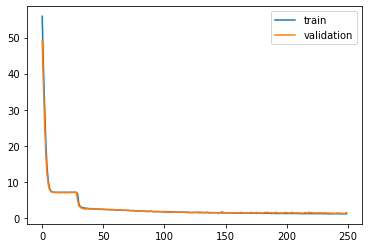

In [17]:
#Performed manually
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='validation')
plt.legend(loc="upper right")

plt.show()

# Results

In [18]:
res_mse, res_mae = model.evaluate(features_test_scaled, labels_test, verbose=0)

In [19]:
print(res_mae)

1.4593952894210815
